# **Data wrangling**

In this notebook, I will: <br>
    $\;\;\;\;\;\;$1. download the data <br>
    $\;\;\;\;\;\;$2. describe the features <br>
    $\;\;\;\;\;\;$3. rename columns if necessary <br>
    $\;\;\;\;\;\;$4. check the data <br>
    $\;\;\;\;\;\;$5. handle missing data <br>
    $\;\;\;\;\;\;$6. save the cleaned data <br>

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

This data was downloaded from Kaggle (http.s://www.kaggle.com/amanajmera1/framingham-heart-study-dataset).

In [2]:
# Read the datafile into pandas
df = pd.read_csv('../data/framingham.csv')

In [3]:
# Display the header of the file to check if the data are loaded properly
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Check the dimension of the datafile
df.shape

(4240, 16)

This dataset has 16 attributes with 4240 rows.

In [5]:
#Check the datatype of each attributes
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [6]:
#Check the name of the columns
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
#change column name "male" to "gender" where 0 represent female and 1 represent male
fhd = df.rename(index = str, columns={"male":"gender"})

In [8]:
#Again check the name of the columns to make sure that the column name "male" has been changed to "gender"
fhd.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Description of the column name are as below:

$\;\;\;\;\;\;$ gender: 0 = Female, 1 = Male<br>
$\;\;\;\;\;\;$ age: age at the time of exam<br>
$\;\;\;\;\;\;$ education: 1 = some high school, 2 = high school diploma or GED, 3 = some college or vocational school, and 4 = college degree<br>
$\;\;\;\;\;\;$ BPMeds: whether or not the patient was on blood pressure medication<br>
$\;\;\;\;\;\;$ prevalentStroke: whether or not the patient had previously had a stroke<br>
$\;\;\;\;\;\;$ prevalentHyp: whether or not the patient was hypertensive<br>
$\;\;\;\;\;\;$ diabetes: whether or not the patient had diabetes<br>
$\;\;\;\;\;\;$ totChol: total cholesterol level<br>
$\;\;\;\;\;\;$ sysBP: systolic blood pressure<br>
$\;\;\;\;\;\;$ diaBP: diastolic blood pressure<br>
$\;\;\;\;\;\;$ BMI: Body Mass Index<br>
$\;\;\;\;\;\;$ heartRate: heart rate<br>
$\;\;\;\;\;\;$ glucose: glucose level<br>
$\;\;\;\;\;\;$ TenYearCHD: Occurrence of heart disease

In [9]:
#Check summary statistics of the data
fhd.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


In [10]:
#Check if there are any duplicate rows
fhd.duplicated().value_counts()

False    4240
dtype: int64

In [11]:
#count the number of missing data also compute the percentage of missing data and concatenate them into one table
missing = pd.concat([fhd.isnull().sum(), 100 * fhd.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
gender,0,0.000000
age,0,0.000000
currentSmoker,0,0.000000
prevalentStroke,0,0.000000
prevalentHyp,0,0.000000
diabetes,0,0.000000
sysBP,0,0.000000
diaBP,0,0.000000
TenYearCHD,0,0.000000
heartRate,1,0.023585


'glucose' has the most missing values which account for 388 followed by 'education' which has 105 missing values. Other variable that has missing values include 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', and 'heartRate'.

In [12]:
#Count the number of rows that has multiple missing values
missing_price = fhd[['heartRate', 'BMI', 'cigsPerDay', 'totChol', 'BPMeds', 'education', 'glucose']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    86.273585
1    12.287736
2     1.391509
3     0.047170
dtype: float64

86% of the rows has no missing values. About 12.28% has only one missing data. 1.39% and 0.04% rows have 2 and 3 missing data respectively.

Our target response feature is TenYearCHD where 1 represents presence and 0 represents absence of heart disease. There is no missing data for this feature.

I decided to delete the rows with missing values.

In [13]:
# drop rows with missing values
fhd_nomissing_data = fhd.dropna()

In [14]:
#Count the number and compute the % of people with or without heart disease in the dataset
missing = pd.concat([fhd_nomissing_data['TenYearCHD'].value_counts(), 100 * fhd_nomissing_data['TenYearCHD'].value_counts()/fhd_nomissing_data['TenYearCHD'].value_counts().sum()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
1,557,15.2269
0,3101,84.7731


Visualize the histogram of the features to check if there are any outliers or abnormality in the dataset.

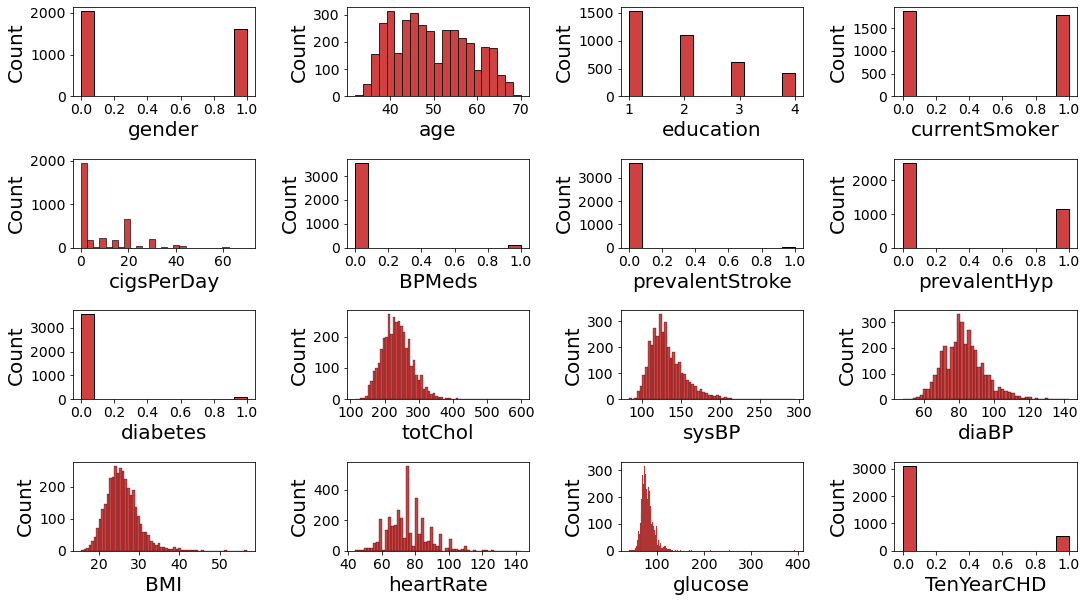

In [15]:
# Generate the histogram of all the features in the dataset
x = 4  # subplot row number
y = 4  # subplot column number
z = 1  # counter

fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

for i in fhd_nomissing_data.columns:
    plt.subplot(x, y, z)
    sns.histplot(data=fhd_nomissing_data, x=i, color = '#C00000')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.subplots_adjust(hspace=0.7)
    z += 1
plt.show()

There are few people with very high total cholestrol, glucose or systolic blood pressure.

In [16]:
# save the data file
datapath = '../data'
#save_file(fhd_nomissing_data, 'fhd_data_cleaned.csv', datapath)
fhd_nomissing_data.to_csv(r'..\data\fhd_data_cleaned.csv', index = False, header=True)
